# Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 13s 1us/step


In [31]:
len(X_train)


60000

In [32]:
len(X_test)


10000

In [33]:
X_train[0].shape


(28, 28)

In [3]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

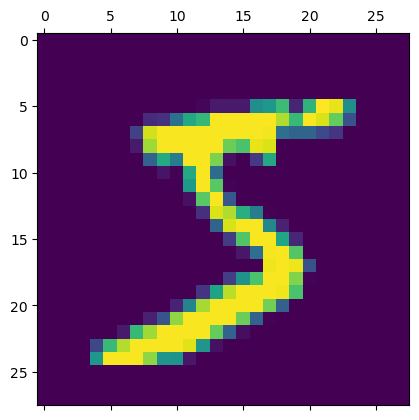

In [4]:
plt.matshow(X_train[0])


In [5]:
y_train[0]


5

In [6]:
X_train = X_train / 255
X_test = X_test / 255


In [34]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [35]:
X_train_flattened.shape

(60000, 784)

In [40]:
X_train_flattened[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4633 - accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9260


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2696 - accuracy: 0.9266


[0.2695794701576233, 0.9265999794006348]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]


313/313 [==============================] - 1s 1ms/step


array([2.5122648e-02, 2.7284736e-07, 5.3387884e-02, 9.5142061e-01,
       1.8527252e-03, 1.0065990e-01, 3.1873374e-06, 9.9983901e-01,
       1.0398821e-01, 6.2963533e-01], dtype=float32)

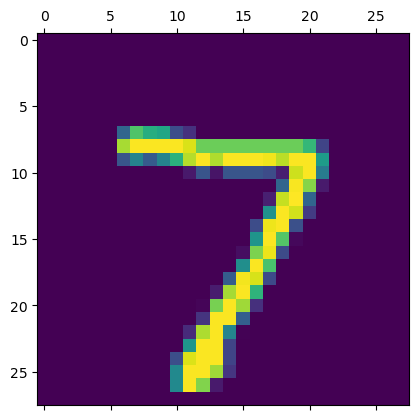

In [13]:
plt.matshow(X_test[0])


# np.argmax finds a maximum element from an array and returns the index of it


In [14]:
np.argmax(y_predicted[0])


7

In [16]:

y_predicted_labels = [np.argmax(i) for i in y_predicted]



In [17]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    4,    9,    4,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   6,    9,  914,   17,    9,    5,   14,   12,   43,    3],
       [   3,    0,   15,  927,    0,   19,    2,   13,   26,    5],
       [   1,    1,    3,    1,  914,    0,   12,    7,   10,   33],
       [  11,    1,    2,   34,   11,  769,   18,    8,   32,    6],
       [   9,    3,    4,    1,    7,    8,  921,    2,    3,    0],
       [   1,    5,   22,    5,    5,    0,    0,  966,    3,   21],
       [   8,    4,    6,   17,    9,   18,   11,   14,  882,    5],
       [  11,    5,    1,    9,   25,    7,    0,   36,    9,  906]])>

Text(95.72222222222221, 0.5, 'Truth')

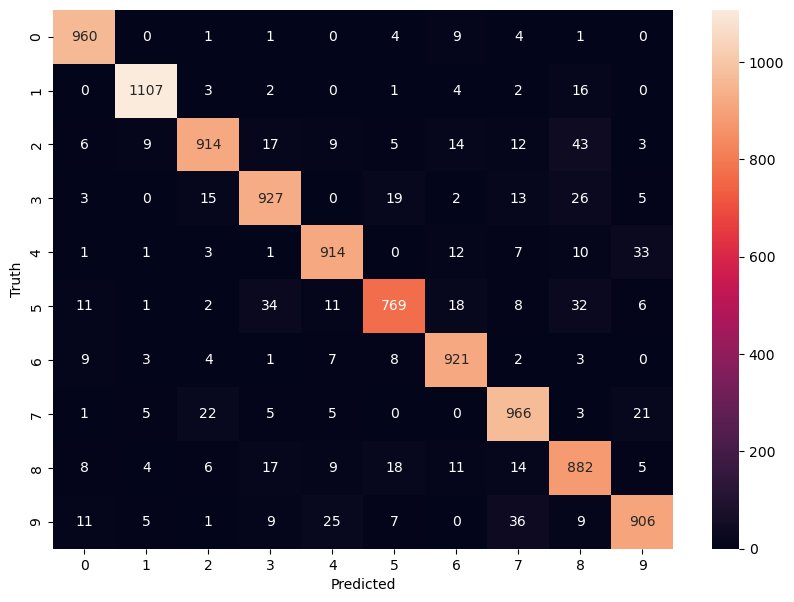

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Using hidden layer

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2734 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1209 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0834 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0651 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9844


In [21]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9750


[0.08142401278018951, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

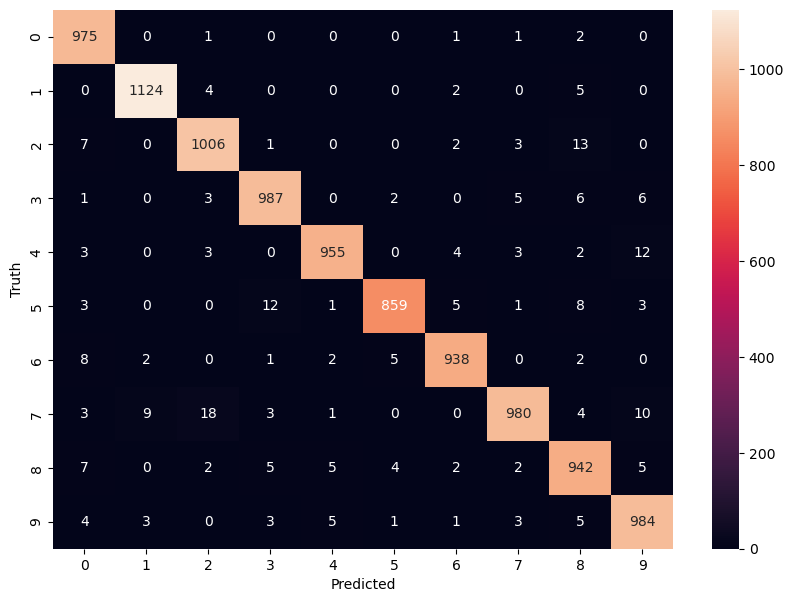

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Using Flatten layer so that we don't have to call .reshape on input dataset


In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2771 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1259 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0819 - accuracy: 0.9774


[0.08187162131071091, 0.977400004863739]

# Accuracy:97.75%


# Result: Handwritten digits classification using neural network is performed.
